#Decision Tree Exercise - Fake News Classifier
In this exercise, you will use decision tree to determine whether a headline is real or fake news. 

We have collected 1298 “fake news” headlines (which mostly include headlines of articles classified as biased etc.) and 1968 “real” news headlines. Before doing the exercise, please make sure you have uploaded `clean_real.txt`, and `clean_fake.txt` to the `/Colab Notebooks` folder in **your own** Google Drive, This exercise will read the data directly from Google Drive. Each headline appears as a single line in the data file.

In [4]:
import numpy as np
import random
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import graphviz

# mount your Google Drive, so that you can read data from it.
# Note: it needs your authorization.
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

###Part 1: Data Loading

Read the data of each file into a list. The element of the list is a string (a news headline). We have completed this part for you.


In [ ]:
def load_data(file):
    with open(file, 'r') as f:
        lines = f.readlines()

    return lines

real_file = "/content/drive/My Drive/Colab Notebooks/real_headline.txt"
fake_file = "/content/drive/My Drive/Colab Notebooks/fake_headline.txt"

real_data = load_data(real_file)
fake_data = load_data(fake_file)

print(real_data[:5])
print(fake_data[:5])

['donald trump do you remember the year since he was elected\n', 'trump defends son over emails as moscow hits back\n', 'donald trump strategist says media wont easily give back america\n', 'anthony scaramucci who is donald trumps new comms director\n', 'donald trumps mobile phone use worries security experts\n']
['trump warns of vote flipping on machines\n', 'this election is not about trump its about a giant middle finger to washington dc\n', 'more on trump populism and how it can be controlled by government\n', 'trump bollywood ad meant to sway indian american voters is an hilarious fail\n', 'dems could be up on charges for inciting trump rally violence\n']


###Part 2: Divide Data into Train/Val and Test
You will randomly divide the data into two parts: Train/Val (80%) and Test (20%). 
* Shuffle the data to a random order.
* Divide the data into Train/Val and Test.
* Combine the "fake" and "real" data.

We use numpy arrays to store the labels (`1` represents "real" and `0` represents "fake"). They also need to be divided and combined.

In [ ]:
random.seed(0)
random.shuffle(real_data)
random.shuffle(fake_data)

real_y = np.ones((len(real_data),))
fake_y = np.zeros((len(fake_data),))

##########################
num_real_train_val = int(len(real_data) * 0.8)
num_fake_train_val = int(len(fake_data) * 0.8)

train_val_data = real_data[:num_real_train_val] + fake_data[:num_fake_train_val]
test_data = real_data[num_real_train_val:] + fake_data[num_fake_train_val:]

train_val_y = np.concatenate((real_y[:num_real_train_val], fake_y[:num_fake_train_val]))
test_y = np.concatenate((real_y[num_real_train_val:], fake_y[num_fake_train_val:]))
##########################

print(len(train_val_data), len(train_val_y))
print(len(test_data), len(test_y))

2612 2612
654 654


###Part 3: Text Feature Extraction
You will build feature vectors for all headlines with `sklearn` package. Specifically, in this exercise, we use `sklearn.feature_extraction.text.CountVectorizer` which converts the headline into a sparse vector. For more details, please refer to https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text

In [ ]:
##########################
vectorizer = CountVectorizer()
train_val_X = vectorizer.fit_transform(train_val_data)
test_X = vectorizer.transform(test_data)
##########################

print(train_val_X.shape)
print(test_X.shape)

(2612, 5152)
(654, 5152)


###Part 4: Decision Tree Parameter Tuning via Cross Validation
In this part, you will train a decision tree with the Train/Val data, then use the tree to classify the Test data. Here, we build the decision tree with `sklearn.tree.DecisionTreeClassifier`.

- You need to find the optimal parameters for the decision tree. In particular, the **depth of tree** is an important parameter. The K-Folds cross-validation will be conducted to find the best parameter by using `sklearn.model_selection.KFold`.
 We choose the number of folds as **K=5**.

- After get the best parameter, you will evaluate the classification performance of the decision tree model on the Test data.



Depth:  10
Training accuracy:  80.63690188524534 %
Validation accuracy:  48.99826377442253 %
Depth:  25
Training accuracy:  87.81528672632449 %
Validation accuracy:  63.928558346703014 %
Depth:  50
Training accuracy:  95.50116467896316 %
Validation accuracy:  68.21425170142781 %
Depth:  75
Training accuracy:  97.81758630878079 %
Validation accuracy:  67.60298308462085 %
Depth:  100
Training accuracy:  99.06189862139574 %
Validation accuracy:  68.10077434195586 %
Depth:  125
Training accuracy:  99.77982185107226 %
Validation accuracy:  66.37780854633232 %
Depth:  150
Training accuracy:  100.0 %
Validation accuracy:  65.76573408643034 %


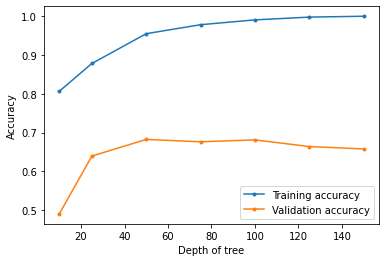

In [ ]:
def dtc_parameter_tune(train_val_X, train_val_y):
    depths = [10, 25, 50, 75, 100, 125, 150]
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)
    for depth in depths:
        train_acc = []
        val_acc = []
        print("========= depth:", depth)
        for train_index, val_index in kf.split(train_val_X):
            ##########################
            train_X = train_val_X[train_index,:]
            val_X = train_val_X[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]
            
            dtc = tree.DecisionTreeClassifier(max_depth=depth)
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))
            print("========= val_index:", val_index)
            ##########################

        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)
        print("Depth: ", depth)
        print("Training accuracy: ", avg_train_acc * 100, "%")
        print("Validation accuracy: ", avg_val_acc * 100, "%")

        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)

    return depths, train_acc_all, val_acc_all

depths, train_acc_all, val_acc_all = dtc_parameter_tune(train_val_X, train_val_y)

# plot training/validation curves
plt.plot(depths, train_acc_all, marker='.', label="Training accuracy")
plt.plot(depths, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

###Part 5: Evaluating the decision tree model on Test data

In [ ]:
##########################
best_depth = depths[np.argmax(val_acc_all)]
dtc = tree.DecisionTreeClassifier(max_depth=best_depth)
dtc.fit(train_val_X, train_val_y)
train_acc = dtc.score(train_val_X, train_val_y)
test_acc = dtc.score(test_X, test_y)
##########################
print("=========================================")
print("Best depth: ", best_depth)
print("Training accuracy: ", train_acc * 100, "%")
print("Test accuracy: ", test_acc * 100, "%")

Best depth:  50
Training accuracy:  94.7166921898928 %
Test accuracy:  75.99388379204893 %


###Part 6: Visualizing Decision Tree
Finally, you will visualize the decision tree by using `sklearn.tree.export_graphviz`.

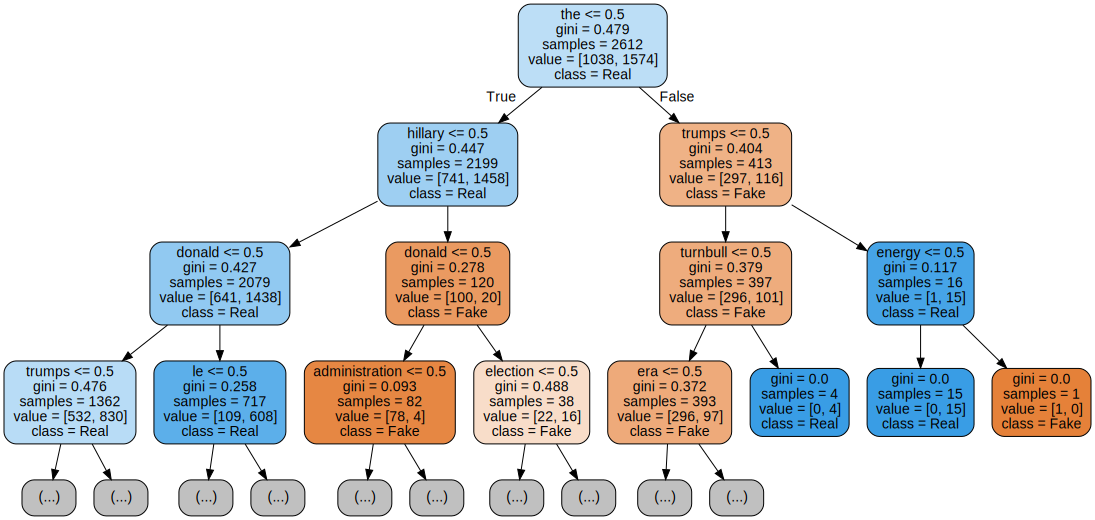

In [ ]:
##########################
dot_data = tree.export_graphviz(dtc, max_depth=3, filled=True, rounded=True, feature_names=vectorizer.get_feature_names(), class_names=["Fake", "Real"])
graph = graphviz.Source(dot_data)
##########################
graph